In [ ]:
!pip install scikit_learn matplotlib numpy pandas

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score ,accuracy_score


### **Regression Models**

In [232]:
data = pd.read_csv('/content/Chocolate Sales.csv')

In [ ]:
data.head(n=10)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184
5,Van Tuxwell,India,Smooth Sliky Salty,06-Jun-22,"$5,376",38
6,Oby Sorrel,UK,99% Dark & Pure,25-Jan-22,"$13,685",176
7,Gunar Cockshoot,Australia,After Nines,24-Mar-22,"$3,080",73
8,Jehu Rudeforth,New Zealand,50% Dark Bites,20-Apr-22,"$3,990",59
9,Brien Boise,Australia,99% Dark & Pure,04-Jul-22,"$2,835",102


In [233]:
data.describe(include='all')

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
count,1094,1094,1094,1094,1094,1094.000000
unique,25,6,22,168,827,NaN
top,Kelci Walkden,Australia,50% Dark Bites,13-Jan-22,"$2,317",NaN
freq,54,205,60,16,5,NaN
mean,NaN,NaN,NaN,NaN,NaN,161.797989
std,NaN,NaN,NaN,NaN,NaN,121.544145
min,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,70.000000
50%,NaN,NaN,NaN,NaN,NaN,135.000000
75%,NaN,NaN,NaN,NaN,NaN,228.750000


In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [235]:
from sklearn.preprocessing import LabelEncoder

In [236]:
encoder= LabelEncoder()
data['Sales Person_encodded'] = encoder.fit_transform(data['Sales Person'])
data['Country_encodded'] = encoder.fit_transform(data['Country'])
data['Product_encodded'] = encoder.fit_transform(data['Product'])

In [237]:
data.describe(include='all')

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Sales Person_encodded,Country_encodded,Product_encodded
count,1094,1094,1094,1094,1094,1094.000000,1094.000000,1094.000000,1094.000000
unique,25,6,22,168,827,NaN,NaN,NaN,NaN
top,Kelci Walkden,Australia,50% Dark Bites,13-Jan-22,"$2,317",NaN,NaN,NaN,NaN
freq,54,205,60,16,5,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,161.797989,11.938757,2.439671,10.696527
std,NaN,NaN,NaN,NaN,NaN,121.544145,7.168786,1.732188,6.475745
min,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,70.000000,6.000000,1.000000,5.000000
50%,NaN,NaN,NaN,NaN,NaN,135.000000,12.000000,2.000000,11.000000
75%,NaN,NaN,NaN,NaN,NaN,228.750000,18.000000,4.000000,16.000000


In [238]:
"""Numpy Axis is a type of direction through which the iteration starts.
Every operation in numpy has a specific iteration process through which the
operation proceeds. Moreover, there are two types of the iteration process:
Column order and Fortran order. Column order helps through the column axis,
and Fortran order helps through the row axis."""

"""Axis 0 is the direction along rows but performs column-wise operations."""
"""axis 1, according to the axis convention. For instance, it refers to the direction along columns performing operations over rows."""


data = data.drop(['Sales Person','Product','Country','Date'],axis=1)



In [239]:
data['Amount'] = data['Amount'].str.replace('$','')
data['Amount'] = data['Amount'].str.replace(',','')

In [240]:
data

,Amount,Boxes Shipped,Sales Person_encodded,Country_encodded,Product_encodded
0,5320,180,13,4,14
1,7896,94,23,2,2
2,4501,91,9,2,17
3,12726,342,12,0,17
4,13685,184,13,4,17
...,...,...,...,...,...
1089,4410,323,15,0,20
1090,6559,119,13,5,21
1091,574,217,5,1,16
1092,2086,384,8,2,10


In [252]:
features = np.array(data[['Amount','Product_encodded','Sales Person_encodded' , 'Country_encodded']])
target = np.array(data['Boxes Shipped'])


In [254]:
features.shape

(1094, 4)

In [253]:
target.shape

(1094,)

In [255]:
from sklearn.model_selection import train_test_split

In [256]:
train_x , test_x , train_y , test_y = train_test_split(features,target)

In [258]:
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [259]:
print(mean_squared_error(test_y,model.predict(test_x)))
print(r2_score(test_y,model.predict(test_x)))


14072.467589528986
-0.007271666931044418


In [262]:
model_2 = svm.SVR()
model_2.fit(train_x,train_y)

SVR()

In [263]:
print(mean_squared_error(test_y,model_2.predict(test_x)))
print(r2_score(test_y,model_2.predict(test_x)))

15091.962567286322
-0.08024454103008027


In [264]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import cv2
import os

# Classification **Models**

In [301]:
df = pd.read_csv('/content/credit_data.csv')


In [302]:
df.describe(include='all')
features = df[['income','age','loan']]
target = df['default']

In [303]:
features = np.array(features)
target = np.array(target)

In [304]:
train_x , test_x , train_y , test_y = train_test_split(features,target)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1500, 3)
(1500,)
(500, 3)
(500,)


In [305]:
from sklearn.model_selection import cross_validate

In [272]:
model = LogisticRegression()
predict = cross_validate(model,train_x,train_y,cv=2
                         )


In [273]:
predict['test_score'].mean()

0.9453333333333334

In [274]:
from sklearn.neighbors import KNeighborsClassifier

In [275]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=10)

In [276]:
pred = model.predict(test_x)
print(accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))

0.834
[[409  13]
 [ 70   8]]


In [277]:
from sklearn.preprocessing import MinMaxScaler

In [278]:
x = MinMaxScaler()
df['income'] = x.fit_transform(df[['income']])

In [279]:

features = df[['income','age','loan']]
target = df['default']

In [280]:
train_x , test_x , train_y , test_y = train_test_split(features,target)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1500, 3)
(1500,)
(500, 3)
(500,)


In [281]:
model = LogisticRegression()
predict = cross_validate(model,train_x,train_y,cv=100
                         )


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [282]:
print(predict['test_score'].mean())

0.9473333333333335


In [283]:
from sklearn.naive_bayes import GaussianNB

In [284]:
model= GaussianNB()
model.fit(train_x,train_y)
print(accuracy_score(test_y,model.predict(test_x)))
print(confusion_matrix(test_y,model.predict(test_x)))


0.924
[[415   3]
 [ 35  47]]


In [285]:
from mlxtend.plotting import plot_decision_regions
from sklearn import svm

In [291]:
model = svm.SVC(C=1000000000000)
model.fit(train_x,train_y)
print(accuracy_score(test_y,model.predict(test_x)))
print(confusion_matrix(test_y,model.predict(test_x)))

0.952
[[411   7]
 [ 17  65]]


In [307]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [317]:
best_param = {'max_depth':np.arange(1,100)}
model =DecisionTreeClassifier(max_depth=71)
model.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=71)

In [314]:
print(accuracy_score(test_y,model.predict(test_x)))
print(confusion_matrix(test_y,model.predict(test_x)))

0.988
[[415   4]
 [  2  79]]


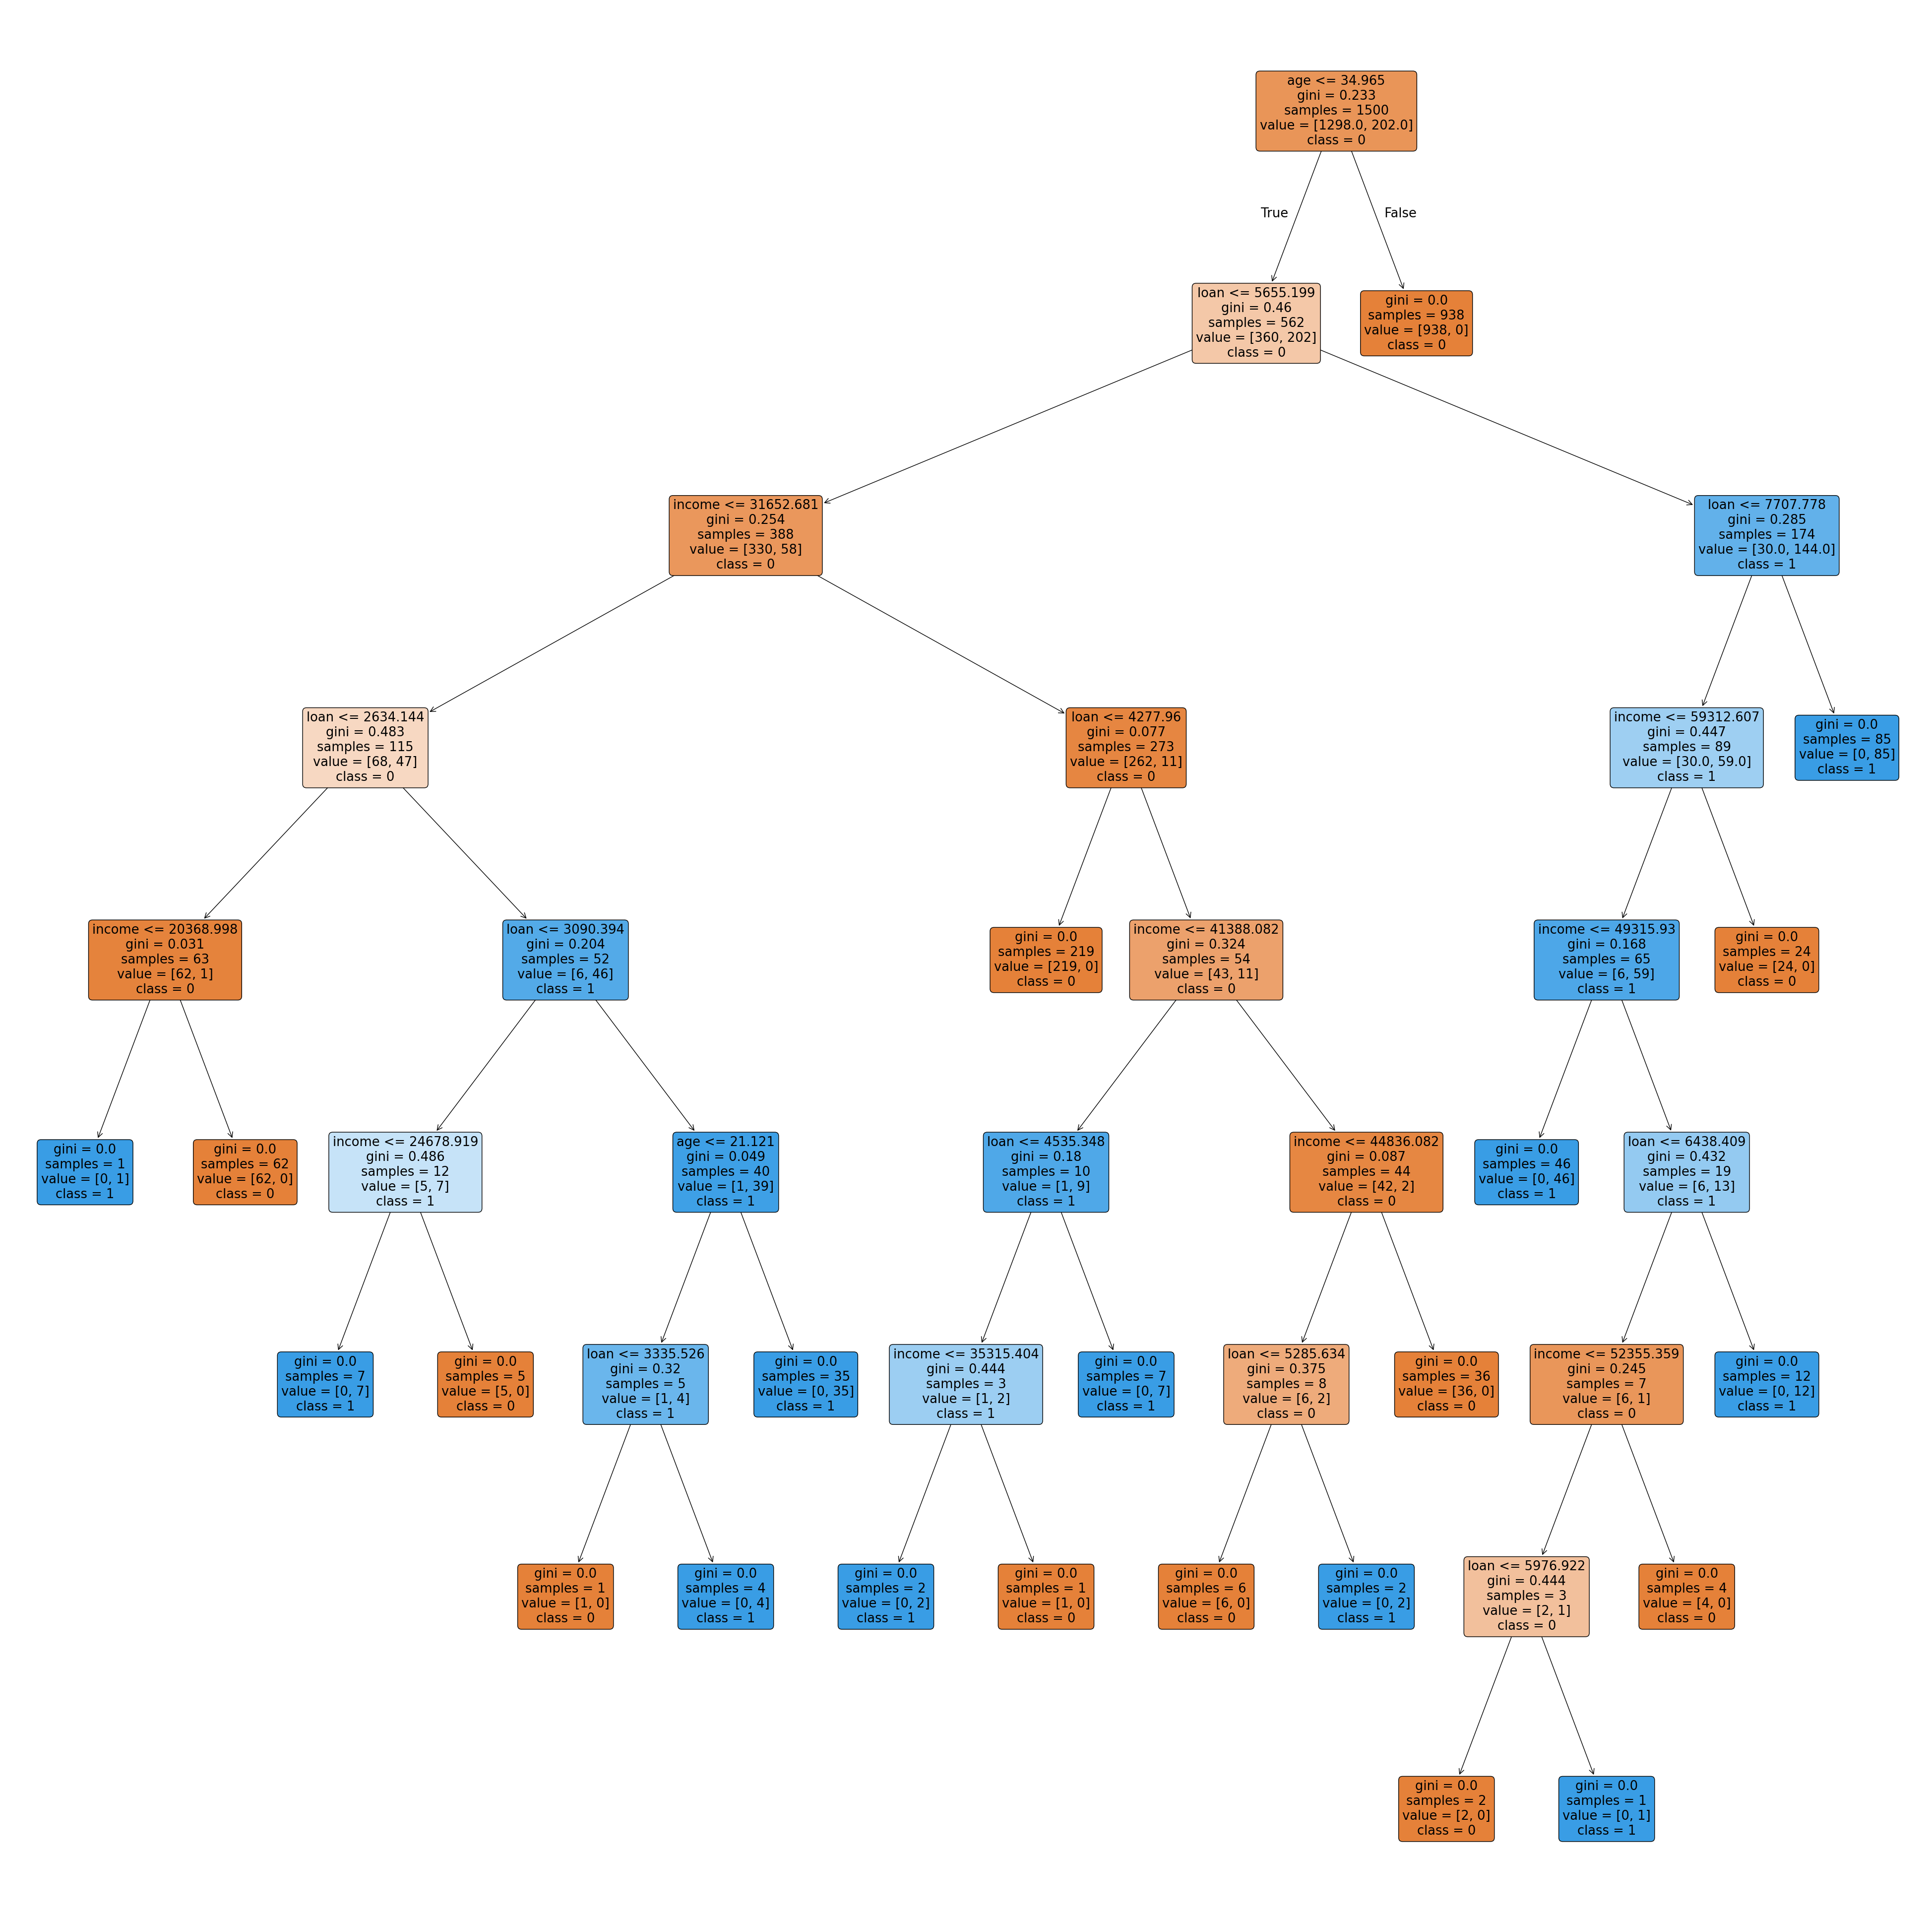

In [319]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(model,feature_names=['income','age','loan'],class_names=['0','1'],filled=True , rounded = True)
plt.show()

In [322]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000)
model.fit(train_x,train_y)
print(accuracy_score(test_y,model.predict(test_x)))
print(confusion_matrix(test_y,model.predict(test_x)))

0.986
[[416   3]
 [  4  77]]


In [327]:
from sklearn.ensemble import AdaBoostClassifier
model =AdaBoostClassifier(n_estimators=1000)
model.fit(train_x,train_y)
print(accuracy_score(test_y,model.predict(test_x)))
print(confusion_matrix(test_y,model.predict(test_x)))

0.986
[[415   4]
 [  3  78]]
